In [1]:
# Импорт необходимых библиотек
import pandas as pd 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier  
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler  

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    f1_score,
    roc_auc_score,
    RocCurveDisplay,
    confusion_matrix,
    brier_score_loss,
)

from sklearn.calibration import CalibratedClassifierCV, calibration_curve

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загрузка данных
df = pd.read_csv("S05-hw-dataset.csv")
df.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [3]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   client_id                        3000 non-null   int64  
 1    age                             3000 non-null   int64  
 2    income                          3000 non-null   int64  
 3    years_employed                  3000 non-null   int64  
 4    credit_score                    3000 non-null   int64  
 5    debt_to_income                  3000 non-null   float64
 6    num_credit_cards                3000 non-null   int64  
 7    num_late_payments               3000 non-null   int64  
 8    has_mortgage                    3000 non-null   int64  
 9    has_car_loan                    3000 non-null   int64  
 10   savings_balance                 3000 non-null   int64  
 11   checking_balance                3000 non-null   int64  
 12   region_risk_score  

((3000, 17), None)

In [4]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [5]:
# Удаление лишнего пробела в названии колонок
df.columns = [df.columns[0]] + [col[1:] for col in df.columns[1:]]
df.columns.tolist()

['client_id',
 'age',
 'income',
 'years_employed',
 'credit_score',
 'debt_to_income       ',
 'num_credit_cards',
 'num_late_payments',
 'has_mortgage',
 'has_car_loan',
 'savings_balance',
 'checking_balance',
 'region_risk_score    ',
 'phone_calls_to_support_last_3m',
 'active_loans',
 'customer_tenure_years',
 'default']

In [6]:
# Распределение таргета
df["default"].value_counts(normalize=True)

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

Количество объектов - 3000
Количество признаков - 15
-------------------------
Отрицательные метки - 59%
Положительные метки - 41%
-------------------------
Аномальных значений не выявлено. 
Датасет показывает отличные метрики качества по результатм обработки ядром EDA-CLI

In [7]:
# Исходные признаки и метки
X = df.iloc[:, 1:-1]
y = df["default"]

In [8]:
# Разбиение на трейн и тест с равным соотношением меток в выборках
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      
    random_state=42,
    stratify=y
)

Бэйзлайн-классификатор

In [9]:
dummy = DummyClassifier(strategy="stratified", random_state=42)
dummy.fit(X_train, y_train)

DummyClassifier(random_state=42, strategy='stratified')

In [10]:
def evaluate_model(model, X_test, y_test, model_name='UnknownModel'):
    """Оценка модели на тестовых данных"""
    predicts = model.predict(X_test)
    probas = model.predict_proba(X_test)[:, 1]
    print(f"""------------------------
Метрики {model_name}
------------------------
Accuracy: {accuracy_score(y_test, predicts):.4f}
Precision: {precision_score(y_test, predicts):.4f}
F1: {f1_score(y_test, predicts):.4f}
ROC-AUC: {roc_auc_score(y_test, probas):.4f}
""")
    

In [11]:
evaluate_model(dummy, X_test, y_test, model_name='DummyClassifier')

------------------------
Метрики DummyClassifier
------------------------
Accuracy: 0.5133
Precision: 0.4109
F1: 0.4206
ROC-AUC: 0.5008



Бейзлайн-моель предсказывает случайные значения, сохраняя распределение классов из обучающих данных.
Она задает нижнюю планку качества прогнозов, помогает объективно оценивать разработанные модели,
выявлять шумные данные и неинформативные признаки.

In [12]:
# Базовый пайплайн логистической регрессии
model_name = 'LRPipe'
raw_lr_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(
        max_iter=1000,
        solver='liblinear'
    ))
])

Простая логистическая регрессия

In [13]:
# GridSearch-подбор гиперпараметров
param_grid = {
    "logreg__C": [0.01, 0.1, 1.0, 10.0, 100.0],
    'logreg__penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(
    estimator=raw_lr_pipe,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    verbose=1,
)

grid_search.fit(X_train, y_train)

print("Лучшие гиперпараметры:", grid_search.best_params_)
print("Лучший Accuracy (по CV):", grid_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Лучшие гиперпараметры: {'logreg__C': 0.1, 'logreg__penalty': 'l1'}
Лучший Accuracy (по CV): 0.7891666666666667


In [14]:
# Установка гиперпараметров и тестирование
lr_pipe = grid_search.best_estimator_
evaluate_model(lr_pipe, X_test, y_test, model_name=model_name)

------------------------
Метрики LRPipe
------------------------
Accuracy: 0.8017
Precision: 0.7981
F1: 0.7407
ROC-AUC: 0.8766



In [15]:
def plot_confusion_matrix(model, X_test, y_test, model_name='UnknownModel'):
    """Визуализация confusion matrix"""
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='PiYG',
                xticklabels=['Ложные', 'Истинные'],
                yticklabels=['Ложные', 'Истинные'])
    
    plt.title('Матрица ошибок')
    plt.ylabel('Истинные метки')
    plt.xlabel('Предсказанные метки')
    p = f'figures/{model_name}_confusion_matrix.png'
    plt.savefig(p)
    print(f"График сохранен: {p}")
    plt.show()

График сохранен: figures/LRPipe_confusion_matrix.png


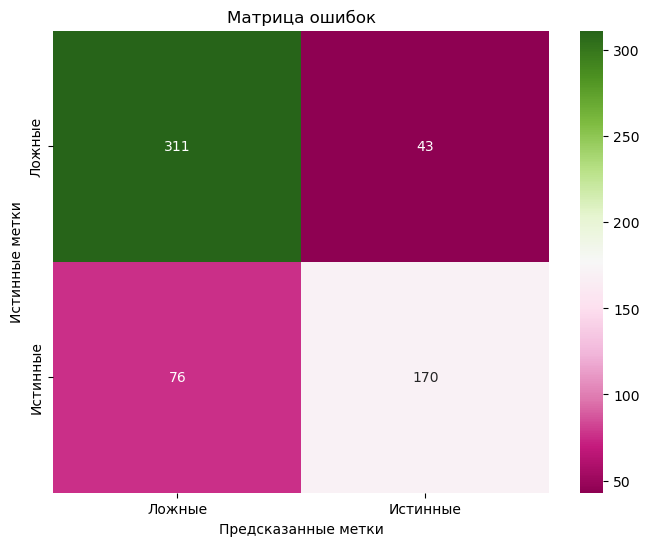

In [16]:
plot_confusion_matrix(lr_pipe, X_test, y_test, model_name=model_name)

In [17]:
def plot_roc(model, X_test, y_test, model_name='UnknownModel'):
    """Визуализация ROC-кривой"""
    y_probas = model.predict_proba(X_test)[:, 1]
    RocCurveDisplay.from_predictions(
        y_test,
        y_probas,
    )
    p = f'figures/{model_name}_roc.png'
    plt.savefig(p)
    print(f"График сохранен: {p}")

График сохранен: figures/LRPipe_roc.png


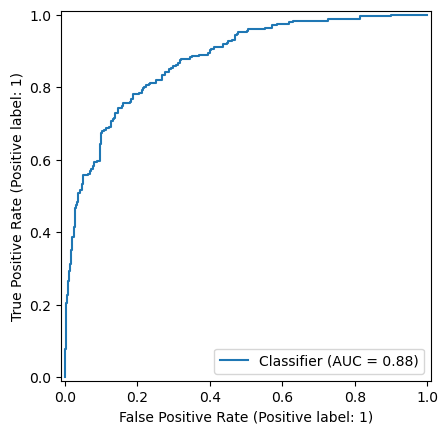

In [18]:
plot_roc(lr_pipe, X_test, y_test, model_name=model_name)

Калибровка модели

In [19]:
model_name = 'CalibratedLRPipe'
calibrated_lr_pipe = CalibratedClassifierCV(
    estimator=lr_pipe,
    method="sigmoid", 
    cv=5,
)

calibrated_lr_pipe.fit(X_train, y_train)
evaluate_model(calibrated_lr_pipe, X_test, y_test, model_name=model_name)

------------------------
Метрики CalibratedLRPipe
------------------------
Accuracy: 0.8033
Precision: 0.8019
F1: 0.7424
ROC-AUC: 0.8769



Сравнение откалиброванной модели с базовой 

In [39]:
def compare_calibration(models_dict, X_test, y_test):
    """Сравнение калибровки нескольких моделей"""
    plt.figure(figsize=(10, 8))
    
    for name, model in models_dict.items():
        y_proba = model.predict_proba(X_test)[:, 1]
        prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)
        plt.plot(prob_pred, prob_true, 'o-', linewidth=2, label=name)
    
    plt.plot([0, 1], [0, 1], 'k--', label='Идеальная калибровка')
    
    plt.xlabel('Средняя прогнозируемая вероятность')
    plt.ylabel('Доля положительных результатов')
    plt.title('Сравнение калибровок')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    p = f'figures/calibration_comparison.png'
    plt.savefig(p)
    print(f"График сохранен: {p}")
    plt.show()

График сохранен: figures/calibration_comparison.png


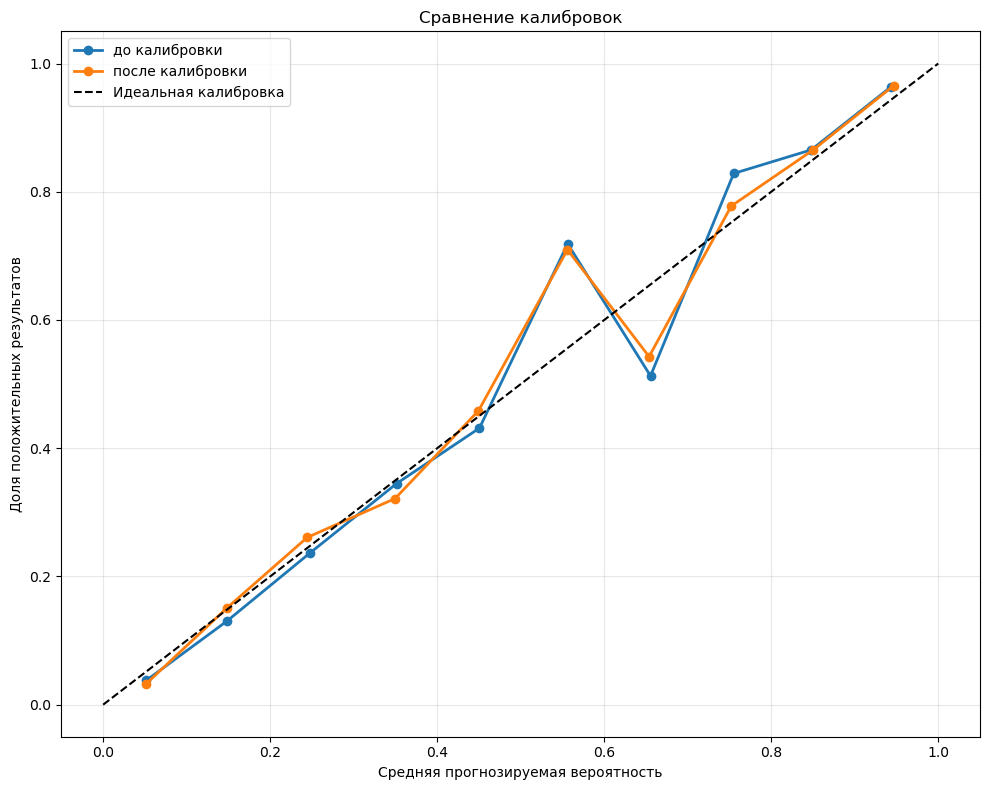

Brier score до калибровки: 0.13876214700181033
Brier score после калибровки:  0.13848447448510165


In [40]:
compare_calibration({
    'до калибровки': lr_pipe,
    'после калибровки': calibrated_lr_pipe
    }, 
    X_test, y_test)


y_test_proba_base = lr_pipe.predict_proba(X_test)[:, 1]
brier_before = brier_score_loss(y_test, y_test_proba_base)
print("Brier score до калибровки:", brier_before)
y_val_proba_cal = calibrated_lr_pipe.predict_proba(X_test)[:, 1]
brier_after = brier_score_loss(y_test, y_val_proba_cal)
print("Brier score после калибровки: ", brier_after)

Машина опорных векторов

In [22]:
model_name = 'SVCPipe'
raw_svc_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(probability=True))   
])

In [23]:
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['auto', 0.1, 0.01],

    # Исоходный grid search, закоменнтирован для быстрых тестов
    # 'svc__C': [0.1, 1, 10, 100],
    # 'svc__kernel': ['linear', 'rbf', 'poly'],
    # 'svc__gamma': ['scale', 'auto', 0.1, 0.01],
    # 'svc__degree': [2, 3, 4]  # для poly
}

svc_grid_search = GridSearchCV(raw_svc_pipe, param_grid, cv=5)
svc_grid_search.fit(X_train, y_train)

print("Лучшие гиперпараметры:", svc_grid_search.best_params_)
print("Лучший Accuracy (по CV):", svc_grid_search.best_score_)

Лучшие гиперпараметры: {'svc__C': 1, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Лучший Accuracy (по CV): 0.7895833333333334


In [25]:
svc_pipe = svc_grid_search.best_estimator_
evaluate_model(svc_pipe, X_test, y_test, model_name=model_name)

------------------------
Метрики SVCPipe
------------------------
Accuracy: 0.8000
Precision: 0.8000
F1: 0.7368
ROC-AUC: 0.8755



График сохранен: figures/SVCPipe_confusion_matrix.png


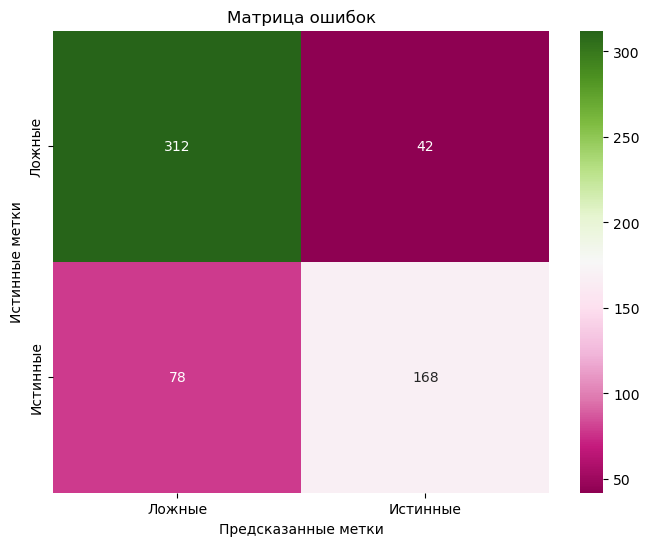

In [26]:
plot_confusion_matrix(svc_pipe, X_test, y_test, model_name=model_name)

График сохранен: figures/SVCPipe_roc.png


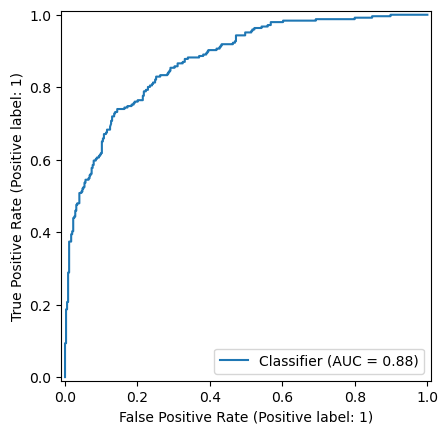

In [27]:
plot_roc(svc_pipe, X_test, y_test, model_name=model_name)

Случайный лес

In [28]:
model_name= 'RFPipe'
raw_rf_pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('rf', RandomForestClassifier(
        random_state=42,
        n_jobs=-1
    ))
])

In [29]:
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [10, 20, 30, None],
    'rf__min_samples_split': [2, 5, 10],
}

rf_grid_search = GridSearchCV(
    raw_rf_pipe,
    param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Обучение
rf_grid_search.fit(X_train, y_train)

print("Лучшие гиперпараметры:", rf_grid_search.best_params_)
print("Лучший Accuracy (по CV):", rf_grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Лучшие гиперпараметры: {'rf__max_depth': 10, 'rf__min_samples_split': 10, 'rf__n_estimators': 100}
Лучший Accuracy (по CV): 0.7620833333333333


In [30]:
rf_pipe = rf_grid_search.best_estimator_
evaluate_model(rf_pipe, X_test, y_test, model_name=model_name)

------------------------
Метрики RFPipe
------------------------
Accuracy: 0.7750
Precision: 0.7761
F1: 0.6980
ROC-AUC: 0.8523



График сохранен: figures/RFPipe_confusion_matrix.png


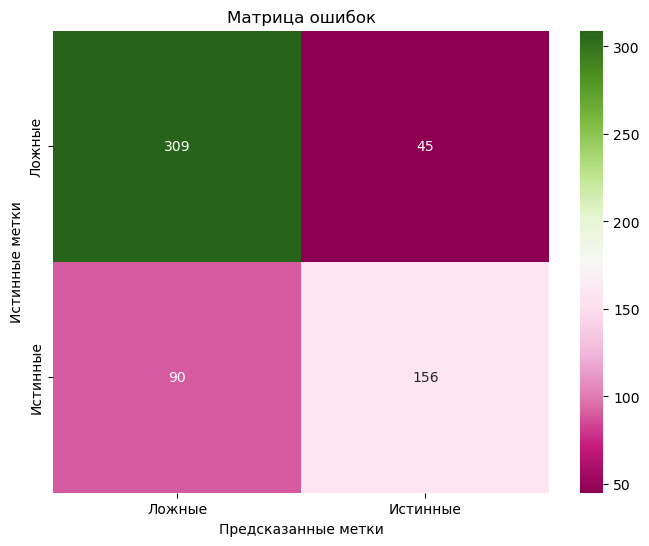

In [31]:
plot_confusion_matrix(rf_pipe, X_test, y_test, model_name=model_name)

График сохранен: figures/RFPipe_roc.png


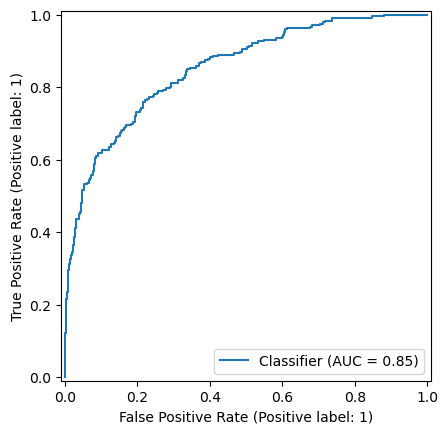

In [32]:
plot_roc(rf_pipe, X_test, y_test, model_name=model_name)

Сравнение всех моделей

In [ ]:
def compare_models_metrics(models_dict, X_test, y_test):
    """Сравнение метрик нескольких моделей"""
    
    all_metrics = []
    
    for model_name, model in models_dict.items():
        y_pred = model.predict(X_test)
        
        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
        
        metrics = {
            'Model': model_name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'F1': f1_score(y_test, y_pred),
            'ROC-AUC': roc_auc
        }
        
        all_metrics.append(metrics)
    
    results_df = pd.DataFrame(all_metrics)
    
    # Сортировка по f1
    results_df = results_df.sort_values('F1', ascending=False).reset_index(drop=True)
    
    return results_df

In [ ]:
models = {
    'DummyClassifier': dummy, # бейзлайн-модель
    'LR': lr_pipe, # логистическая регрессия
    'LR (Calibrated)': calibrated_lr_pipe,  # откалиброванная логистическая регрессия
    'SVM': svc_pipe, # машина опорных векторов
    'RF': rf_pipe # случайный лес
}

comparison_df = compare_models_metrics(models, X_test, y_test)
p = 'artifacts/comprasion.csv'
comparison_df.to_csv(p, index=False, float_format='%.4f')
print(f"Метрики сохранены: {p}")
comparison_df

Метрики сохранены: artifacts/comprasion.csv


,Model,Accuracy,Precision,F1,ROC-AUC
0,LR (Calibrated),0.803333,0.801887,0.742358,0.876935
1,LR,0.801667,0.798122,0.740741,0.876648
2,SVM,0.800000,0.800000,0.736842,0.875454
3,RF,0.775000,0.776119,0.697987,0.852269
4,DummyClassifier,0.513333,0.410853,0.420635,0.500758


Общие выводы

В ходе работы были разработаны 4 модели, метрики которых представлены в таблице выше.
Базовая модель логистической регрессии превосходит бейзлайн-модель примерно на 30% по всем метрикам. Наилучшие результаты показывает модель с регуляризацией L1 и C=0.1. Калибровка этой модели не приводит к значительному повышению качества прогнозов.
Для машины опорных векторов перебирались гиперпарметры регуляризации, ядра, масштаба влияния точек в ядре, степени полинома для полиномиального ядра. Примечательно, что подбор занял около получаса, оптимальный гиперпараметр C=0.1, а лучшее ядро отлично от линейнорго - RBF. Несмотря на это, метрики качества модели сопоставимы с логистической регрессией.
Для случайного леса перебирались следующие гиперпарметры: количество деревьев (наилучшим оказалось промежуточное значение n=100), максимальная глубина дерева и минимальное количество объектов в узле. Случайный лес показал наихудшие результаты в сравнении с другими моделями (но все еще заметно лучше безлайна), предположительно из-за слишком сложного устройства для линейных данных.
Наиболее разумной для решения данной задачи можно считать модель базовой логистической классификации, так как она наиболее проста в обучении и эксплуатации, не нуждается в дополнительной калибровке и демонстрирует результаты уровня более сложных моделей.
